### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Test Again/trial/replication-of-generating-reviews-discovering-sentiment/

/content/drive/MyDrive/Test Again/trial/replication-of-generating-reviews-discovering-sentiment


In [ ]:
!ls

data	    encoder.py	model		      __pycache__  sst_binary_demo.py
demo.ipynb  LICENSE	package_versions.txt  README.md    utils.py


### 1. Install and Import Dependencies

In [ ]:
import os
import html
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, f1_score, auc
from encoder import Model

Instructions for updating:
non-resource variables are not supported in the long term


## 2. Demo The TextVectorization Model

In [ ]:
model = Model()
text = ["I couldn't figure out"]
text_features = model.transform(text)
print(text_features)

Instructions for updating:
dim is deprecated, use axis instead


5.021 seconds to transform 1 examples
[[-0.12958607 -0.7414904   0.06320151 ...  0.12817441  0.07800514
   0.14032531]]


In [ ]:
print(text_features.shape)

(1, 4096)


In [ ]:
print(type(text_features))

<class 'numpy.ndarray'>


## 3. Define Function

In [ ]:
def load_sst(path):
    data = pd.read_csv(path)
    X = data['sentence'].values.tolist()
    Y = data['label'].values
    return X, Y

def sst_binary(data_dir='data/',train_dir="train_binary_sent.csv", val_dir="dev_binary_sent.csv", test_dir="test_binary_sent.csv"):
    """
    Most standard models make use of a preprocessed/tokenized/lowercased version
    of Stanford Sentiment Treebank. Our model extracts features from a version
    of the dataset using the raw text instead which we've included in the data
    folder.
    """
    trX, trY = load_sst(os.path.join(data_dir, train_dir))
    vaX, vaY = load_sst(os.path.join(data_dir, val_dir))
    teX, teY = load_sst(os.path.join(data_dir, test_dir))
    return trX, vaX, teX, trY, vaY, teY

def preprocess(text, front_pad='\n ', end_pad=' '):
    text = html.unescape(text)
    text = text.replace('\n', ' ').strip()
    text = front_pad+text+end_pad
    text = text.encode()
    return text

def train_with_reg_cv(trX, trY, vaX, vaY, teX=None, teY=None, penalty='l1',C=2**np.arange(-8, 1).astype(np.float64), seed=42):
    scores = []
    for i, c in enumerate(C):
        model = LogisticRegression(C=c, penalty=penalty, random_state=seed+i, solver='liblinear')
        model.fit(trX, trY)
        score = model.score(vaX, vaY)
        scores.append(score)
    c = C[np.argmax(scores)]
    model = LogisticRegression(C=c, penalty=penalty, random_state=seed+len(C), solver='liblinear')
    model.fit(trX, trY)
    nnotzero = np.sum(model.coef_ != 0)
    if teX is not None and teY is not None:
        score = model.score(teX, teY)*100.
    else:
        score = model.score(vaX, vaY)*100.
    return score, c, nnotzero, model

## 4. Load the data

Let's take a moment to understand the format of the data. Each example is a sentence representing the movie review and a corresponding label. The sentence is not preprocessed in any way. The label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

### SST

In [ ]:
SST_train_dir = 'SST/SST_train.csv'
SST_val_dir = 'SST/SST_val.csv'
SST_test_dir = 'SST/SST_test.csv'
SST_trX, SST_vaX, SST_teX, SST_trY, SST_vaY, SST_teY = sst_binary('data/',SST_train_dir, SST_val_dir, SST_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(SST_trX), len(SST_teX)))

Training entries: 6920, test entries: 1821


Let's print first 10 examples.

In [ ]:
SST_trX[:10]

['A stirring, funny and finally transporting re-imagining of Beauty and the Beast and 1930s horror films',
 'Apparently reassembled from the cutting-room floor of any given daytime soap.',
 "They presume their audience won't sit still for a sociology lesson, however entertainingly presented, so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes.",
 'This is a visually stunning rumination on love, memory, history and the war between art and commerce.',
 "Jonathan Parker's Bartleby should have been the be-all-end-all of the modern-office anomie films.",
 'Campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful.',
 'A fan film that for the uninitiated plays better on video with the sound turned down.',
 'Béart and Berling are both superb, while Huppert ... is magnificent.',
 'A little less extreme than in the past, with longer exposition sequences between them, and with fewer gags to break 

Let's also print the first 10 labels.

In [ ]:
SST_trY[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

### Amazon

In [ ]:
Amazon_train_dir = 'Amazon/amazon_train.csv'
Amazon_val_dir = 'Amazon/amazon_val.csv'
Amazon_test_dir = 'Amazon/amazon_test.csv'
Amazon_trX, Amazon_vaX, Amazon_teX, Amazon_trY, Amazon_vaY, Amazon_teY = sst_binary('data/',Amazon_train_dir, Amazon_val_dir, Amazon_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(Amazon_trX), len(Amazon_teX)))

Training entries: 24238, test entries: 6926


Let's print first 5 examples.

In [ ]:
Amazon_trX[:5]

["Purchased this as an upgrade to the first generation Kindle Paperwhite. The backlight is greatly improved, the display is of a higher quality, the words are clearer and the internal process is a lot quicker  opening books and page flipping is noticeably speedier.The one thing that does annoy me about the 3rd generation Paperwhite is the way it's manufactured  when you hold it at a certain angle and you look at the bottom of the screen, you can see a small section of the display covered in the e-ink used to render the words and images on the rest of the screen. At first I thought this was a manufacturing defect, so I took it back to Best Buy and exchanged it for the same model, only to find that the second model had the same issue, except more-visible.This appears to have something to do with the way the display is placed behind the bezel during the manufacturing process. When the Paperwhite first came out, it was the crown jewel of Amazon's e-reader line, and Amazon was careful to pr

Let's also print the first 5 labels.

In [ ]:
Amazon_trY[:5]

array([1, 1, 1, 1, 1])

### Yelp

In [ ]:
# Yelp data
New_Yelp_train_dir = 'Yelp/Yelp_train.csv'
New_Yelp_val_dir = 'Yelp/Yelp_val.csv'
New_Yelp_test_dir = 'Yelp/Yelp_test.csv'
New_Yelp_trX, New_Yelp_vaX, New_Yelp_teX, New_Yelp_trY, New_Yelp_vaY, New_Yelp_teY = sst_binary('data/new_data',New_Yelp_train_dir, New_Yelp_val_dir, New_Yelp_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(New_Yelp_trX), len(New_Yelp_teX)))

Training entries: 28000, test entries: 4000


Let's print first 5 examples.

In [ ]:
New_Yelp_teX[:5]

["Great atmosphere for a Scottsdale Restaurant. Although, I'd choose great food over a nice setting.\\nI expected more from an Iron Chef restaurant.\\nService was really slow considering there were several open tables and it was pretty late in the evening. \\nThe best thing was the guacamole. The salmon I order was mediocre at best and the flavors just didn't work.\\nThe tortillas for the tacos were rubbery and chew. The lamb meat wasn't well seasoned and needed salt.",
 'Five...five...five dollar foot longs. This song is very catchy indeed. However the footlongs do not catch my taste buds for long.(no pun intended) Do not get me wrong the bread is fresh and so are the vegetables. The cold cuts? Hmmm not so sure. The grilled chicken pieces they use for the sandwiches, I do not trust. It looks like soy meat. I know it is only $5.00 but for the amount of money I spend on four subs I cold buy sandwich ingredients from the grocery store that will probably last me a week. Better quality too

Let's also print the first 5 labels.

In [ ]:
New_Yelp_teY[:5]

array([0, 0, 0, 1, 0])

### IMDB

In [ ]:
IMDB_train_dir = 'IMDB/IMDB_train.csv'
IMDB_val_dir = 'IMDB/IMDB_val.csv'
IMDB_test_dir = 'IMDB/IMDB_test.csv'
IMDB_trX, IMDB_vaX, IMDB_teX, IMDB_trY, IMDB_vaY, IMDB_teY = sst_binary('data/new_data',IMDB_train_dir, IMDB_val_dir, IMDB_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(IMDB_trX), len(IMDB_teX)))

Training entries: 35000, test entries: 5000


Let's print first 5 examples.

In [ ]:
IMDB_teX[:5]

["I really liked this Summerslam due to the look of the arena, the curtains and just the look overall was interesting to me for some reason. Anyways, this could have been one of the best Summerslam's ever if the WWF didn't have Lex Luger in the main event against Yokozuna, now for it's time it was ok to have a huge fat man vs a strong man but I'm glad times have changed. It was a terrible main event just like every match Luger is in is terrible. Other matches on the card were Razor Ramon vs Ted Dibiase, Steiner Brothers vs Heavenly Bodies, Shawn Michaels vs Curt Hening, this was the event where Shawn named his big monster of a body guard Diesel, IRS vs 1-2-3 Kid, Bret Hart first takes on Doink then takes on Jerry Lawler and stuff with the Harts and Lawler was always very interesting, then Ludvig Borga destroyed Marty Jannetty, Undertaker took on Giant Gonzalez in another terrible match, The Smoking Gunns and Tatanka took on Bam Bam Bigelow and the Headshrinkers, and Yokozuna defended t

Let's also print the first 5 labels.

In [ ]:
IMDB_teY[:5]

array([1, 1, 0, 1, 0])

### Reddit

In [ ]:
Reddit_train_dir = 'Reddit/Reddit_train.csv'
Reddit_val_dir = 'Reddit/Reddit_val.csv'
Reddit_test_dir = 'Reddit/Reddit_test.csv'
Reddit_trX, Reddit_vaX, Reddit_teX, Reddit_trY, Reddit_vaY, Reddit_teY = sst_binary('data/new_data',Reddit_train_dir, Reddit_val_dir, Reddit_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(Reddit_trX), len(Reddit_teX)))

Training entries: 16874, test entries: 2411


Let's print first 5 examples.

In [ ]:
Reddit_teX[:5]

['mesas girl wtf',
 'for the rich except vishesh samudaay there only one religion money',
 'yogi the only deserving candidate for post baki sab bakwaas hain',
 'expected fallout govt which has hindu nationalist roots don blame them the slightest from lynchings attacks free speech the divide has gotten deeper the same story there trump rise has given platform not just ignorant morons but left wing extremists too any political party which steeped much identity politics bound create such headlines',
 'amartya sen says “ indian citizen don’ want modi has not done enough make minorities feel safe ” said being asked why did not want sen said “ could have first all been more secular and could have made the minority community feel more secure ” indian demographics are not uniformly distributed muslim and the rest hindu all over the country there are cities and towns where muslims and christians are majority very large minority yet come across even single town that integrated that where the two

Let's also print the first 5 labels.

In [ ]:
Reddit_teY[:5]

array([0, 1, 1, 0, 1])

### Hotel

In [ ]:
Hotel_train_dir = 'Hotel/Hotel_train.csv'
Hotel_val_dir = 'Hotel/Hotel_val.csv'
Hotel_test_dir = 'Hotel/Hotel_test.csv'
Hotel_trX, Hotel_vaX, Hotel_teX, Hotel_trY, Hotel_vaY, Hotel_teY = sst_binary('data/new_data',Hotel_train_dir, Hotel_val_dir, Hotel_test_dir)

In [ ]:
# Display the length of train , test dataset
print("Training entries: {}, test entries: {}".format(len(Hotel_trX), len(Hotel_teX)))

Training entries: 6999, test entries: 1000


Let's print first 5 examples.

In [ ]:
Hotel_teX[:5]

['Everything was Ok But not great Staff seemed to not want to be there',
 "These little villas are surprisingly clean for the price. I liked that there was no carpet in our villa (Room 113- queen bed) because there's nothing worse than stepping on old, icky motel carpets. The floor was wood laminate that looked newly installed. The bathroom was fine except it did have a shower stall, so the space was a bit... More",
 "A standard not fancy hotel that provides a little privacy and extra space at a good rate if you want an affordable suite. Decent pretty big breakfast buffet (could someone figure out that 15 of us don't digest dairy and really like having something like soy or almond milk). little pool only good for kids. Nice big lobby and lounge areas.Jesse L,Thank you for choosing to stay at Hyatt House during your recent trip to Seattle and for taking the time to share your experience on TripAdvisor. We value the feedback from our guests and are always striving to improve our guests s

Let's also print the first 5 labels.

In [ ]:
Hotel_teY[:5]

array([1, 1, 1, 1, 1])

## 5. Defining and Fitting the Classifiers

We reproduce the original code with a Logistic Regression on top of the text vectorizer model to classify the sentiment

### SST

In [ ]:
SST_trXt = model.transform(SST_trX)
SST_vaXt = model.transform(SST_vaX)
SST_teXt = model.transform(SST_teX)

# Build models with L1 and L2 regularization
SST_full_rep_acc_l1, SST_c_l1, SST_nnotzero_l1, SST_model_l1 = train_with_reg_cv(SST_trXt, SST_trY, SST_vaXt, SST_vaY, SST_teXt, SST_teY, penalty='l1')
SST_full_rep_acc_l2, SST_c_l2, SST_nnotzero_l2, SST_model_l2 = train_with_reg_cv(SST_trXt, SST_trY, SST_vaXt, SST_vaY, SST_teXt, SST_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % SST_full_rep_acc_l1)
print('%05.2f regularization coef' % SST_c_l1)
print('%05d features used' % SST_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % SST_full_rep_acc_l2)
print('%05.2f regularization coef' % SST_c_l2)
print('%05d features used' % SST_nnotzero_l2)

14.494 seconds to transform 6920 examples
1.920 seconds to transform 872 examples
3.836 seconds to transform 1821 examples
L1 Regularization Results:
91.76 test accuracy
00.25 regularization coef
00141 features used
L2 Regularization Results:
91.76 test accuracy
00.03 regularization coef
04096 features used


### Amazon

In [ ]:
Amazon_trXt = model.transform(Amazon_trX)
Amazon_vaXt = model.transform(Amazon_vaX)
Amazon_teXt = model.transform(Amazon_teX)
# classification
# Build models with L1 and L2 regularization
Amazon_full_rep_acc_l1, Amazon_c_l1, Amazon_nnotzero_l1, Amazon_model_l1 = train_with_reg_cv(Amazon_trXt, Amazon_trY, Amazon_vaXt, Amazon_vaY, Amazon_teXt, Amazon_teY, penalty='l1')
Amazon_full_rep_acc_l2, Amazon_c_l2, Amazon_nnotzero_l2, Amazon_model_l2 = train_with_reg_cv(Amazon_trXt, Amazon_trY, Amazon_vaXt, Amazon_vaY, Amazon_teXt, Amazon_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % Amazon_full_rep_acc_l1)
print('%05.2f regularization coef' % Amazon_c_l1)
print('%05d features used' % Amazon_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % Amazon_full_rep_acc_l2)
print('%05.2f regularization coef' % Amazon_c_l2)
print('%05d features used' % Amazon_nnotzero_l2)

77.437 seconds to transform 24238 examples
10.499 seconds to transform 3462 examples
22.667 seconds to transform 6926 examples
L1 Regularization Results:
95.24 test accuracy
00.12 regularization coef
00171 features used
L2 Regularization Results:
95.05 test accuracy
00.03 regularization coef
04096 features used


### Yelp

In [ ]:
New_Yelp_trXt = model.transform(New_Yelp_trX)
New_Yelp_vaXt = model.transform(New_Yelp_vaX)
New_Yelp_teXt = model.transform(New_Yelp_teX)
# Build models with L1 and L2 regularization
New_Yelp_full_rep_acc_l1, New_Yelp_c_l1, New_Yelp_nnotzero_l1, New_Yelp_model_l1 = train_with_reg_cv(New_Yelp_trXt, New_Yelp_trY, New_Yelp_vaXt, New_Yelp_vaY, New_Yelp_teXt, New_Yelp_teY, penalty='l1')
New_Yelp_full_rep_acc_l2, New_Yelp_c_l2, New_Yelp_nnotzero_l2, New_Yelp_model_l2 = train_with_reg_cv(New_Yelp_trXt, New_Yelp_trY, New_Yelp_vaXt, New_Yelp_vaY, New_Yelp_teXt, New_Yelp_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % New_Yelp_full_rep_acc_l1)
print('%05.2f regularization coef' % New_Yelp_c_l1)
print('%05d features used' % New_Yelp_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % New_Yelp_full_rep_acc_l2)
print('%05.2f regularization coef' % New_Yelp_c_l2)
print('%05d features used' % New_Yelp_nnotzero_l2)

327.096 seconds to transform 28000 examples
95.645 seconds to transform 8000 examples
49.614 seconds to transform 4000 examples
L1 Regularization Results:
94.40 test accuracy
00.25 regularization coef
00486 features used
L2 Regularization Results:
94.55 test accuracy
00.03 regularization coef
04096 features used


### IMDB

In [ ]:
IMDB_trXt = model.transform(IMDB_trX)
IMDB_vaXt = model.transform(IMDB_vaX)
IMDB_teXt = model.transform(IMDB_teX)
# Build models with L1 and L2 regularization
IMDB_full_rep_acc_l1, IMDB_c_l1, IMDB_nnotzero_l1, IMDB_model_l1 = train_with_reg_cv(IMDB_trXt, IMDB_trY, IMDB_vaXt, IMDB_vaY, IMDB_teXt, IMDB_teY, penalty='l1')
IMDB_full_rep_acc_l2, IMDB_c_l2, IMDB_nnotzero_l2, IMDB_model_l2 = train_with_reg_cv(IMDB_trXt, IMDB_trY, IMDB_vaXt, IMDB_vaY, IMDB_teXt, IMDB_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % IMDB_full_rep_acc_l1)
print('%05.2f regularization coef' % IMDB_c_l1)
print('%05d features used' % IMDB_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % IMDB_full_rep_acc_l2)
print('%05.2f regularization coef' % IMDB_c_l2)
print('%05d features used' % IMDB_nnotzero_l2)

730.308 seconds to transform 35000 examples
212.392 seconds to transform 10000 examples
106.305 seconds to transform 5000 examples
L1 Regularization Results:
92.32 test accuracy
00.06 regularization coef
00194 features used
L2 Regularization Results:
92.46 test accuracy
00.03 regularization coef
04096 features used


### Reddit

In [ ]:
Reddit_trXt = model.transform(Reddit_trX)
Reddit_vaXt = model.transform(Reddit_vaX)
Reddit_teXt = model.transform(Reddit_teX)
# Build models with L1 and L2 regularization
Reddit_full_rep_acc_l1, Reddit_c_l1, Reddit_nnotzero_l1, Reddit_model_l1 = train_with_reg_cv(Reddit_trXt, Reddit_trY, Reddit_vaXt, Reddit_vaY, Reddit_teXt, Reddit_teY, penalty='l1')
Reddit_full_rep_acc_l2, Reddit_c_l2, Reddit_nnotzero_l2, Reddit_model_l2 = train_with_reg_cv(Reddit_trXt, Reddit_trY, Reddit_vaXt, Reddit_vaY, Reddit_teXt, Reddit_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % Reddit_full_rep_acc_l1)
print('%05.2f regularization coef' % Reddit_c_l1)
print('%05d features used' % Reddit_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % Reddit_full_rep_acc_l2)
print('%05.2f regularization coef' % Reddit_c_l2)
print('%05d features used' % Reddit_nnotzero_l2)

77.039 seconds to transform 16874 examples
23.910 seconds to transform 4822 examples
12.080 seconds to transform 2411 examples
L1 Regularization Results:
73.66 test accuracy
00.06 regularization coef
00406 features used
L2 Regularization Results:
73.41 test accuracy
00.01 regularization coef
04096 features used


### Hotel

In [ ]:
Hotel_trXt = model.transform(Hotel_trX)
Hotel_vaXt = model.transform(Hotel_vaX)
Hotel_teXt = model.transform(Hotel_teX)
# Build models with L1 and L2 regularization
Hotel_full_rep_acc_l1, Hotel_c_l1, Hotel_nnotzero_l1, Hotel_model_l1 = train_with_reg_cv(Hotel_trXt, Hotel_trY, Hotel_vaXt, Hotel_vaY, Hotel_teXt, Hotel_teY, penalty='l1')
Hotel_full_rep_acc_l2, Hotel_c_l2, Hotel_nnotzero_l2, Hotel_model_l2 = train_with_reg_cv(Hotel_trXt, Hotel_trY, Hotel_vaXt, Hotel_vaY, Hotel_teXt, Hotel_teY, penalty='l2')

print('L1 Regularization Results:')
print('%05.2f test accuracy' % Hotel_full_rep_acc_l1)
print('%05.2f regularization coef' % Hotel_c_l1)
print('%05d features used' % Hotel_nnotzero_l1)

print('L2 Regularization Results:')
print('%05.2f test accuracy' % Hotel_full_rep_acc_l2)
print('%05.2f regularization coef' % Hotel_c_l2)
print('%05d features used' % Hotel_nnotzero_l2)

40.984 seconds to transform 6999 examples
13.899 seconds to transform 2000 examples
8.217 seconds to transform 1000 examples
L1 Regularization Results:
92.10 test accuracy
00.25 regularization coef
00188 features used
L2 Regularization Results:
91.60 test accuracy
00.03 regularization coef
04096 features used


## 6. Evaluation

### Distribution of Results

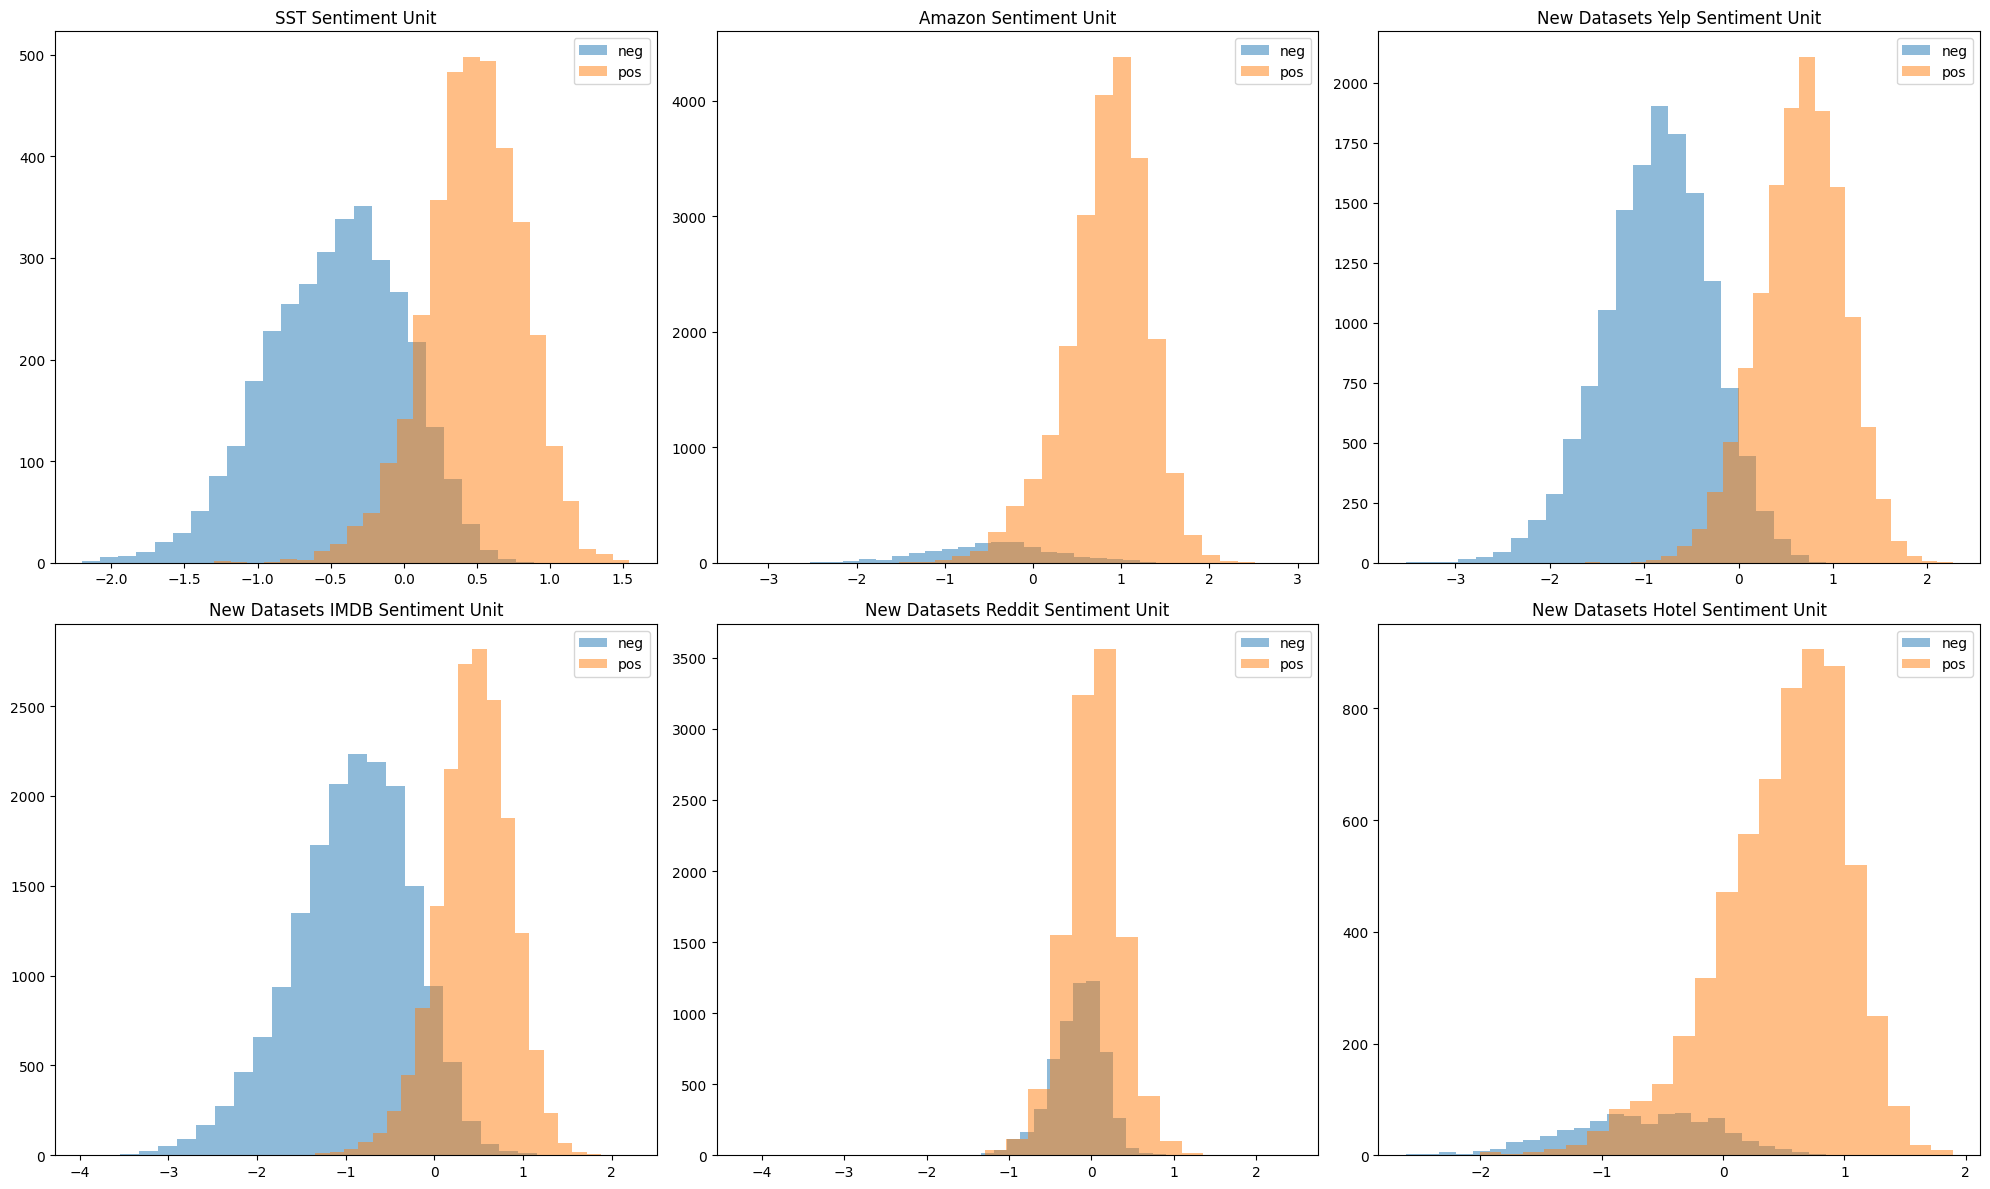

In [ ]:
# Create a single figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
column = 2388
# Plot the histograms for SST_sentiment_unit
SST_sentiment_unit = SST_trXt[:, column]
axes[0,0].hist(SST_sentiment_unit[SST_trY == 0], bins=25, alpha=0.5, label='neg')
axes[0,0].hist(SST_sentiment_unit[SST_trY == 1], bins=25, alpha=0.5, label='pos')
axes[0,0].set_title('SST Sentiment Unit')
axes[0,0].legend()

# Plot the histograms for Amazon_sentiment_unit
Amazon_sentiment_unit = Amazon_trXt[:, column]
axes[0,1].hist(Amazon_sentiment_unit[Amazon_trY == 0], bins=25, alpha=0.5, label='neg')
axes[0,1].hist(Amazon_sentiment_unit[Amazon_trY == 1], bins=25, alpha=0.5, label='pos')
axes[0,1].set_title('Amazon Sentiment Unit')
axes[0,1].legend()

# Plot the histograms for New_Yelp_sentiment_unit
New_Yelp_sentiment_unit = New_Yelp_trXt[:, column]
axes[0,2].hist(New_Yelp_sentiment_unit[New_Yelp_trY == 0], bins=25, alpha=0.5, label='neg')
axes[0,2].hist(New_Yelp_sentiment_unit[New_Yelp_trY == 1], bins=25, alpha=0.5, label='pos')
axes[0,2].set_title('New Datasets Yelp Sentiment Unit')
axes[0,2].legend()

# Plot the histograms for IMDB_sentiment_unit
IMDB_sentiment_unit = IMDB_trXt[:, column]
axes[1,0].hist(IMDB_sentiment_unit[IMDB_trY == 0], bins=25, alpha=0.5, label='neg')
axes[1,0].hist(IMDB_sentiment_unit[IMDB_trY == 1], bins=25, alpha=0.5, label='pos')
axes[1,0].set_title('New Datasets IMDB Sentiment Unit')
axes[1,0].legend()

# Plot the histograms for Reddit_sentiment_unit
Reddit_sentiment_unit = Reddit_trXt[:, column]
axes[1,1].hist(Reddit_sentiment_unit[Reddit_trY == 0], bins=25, alpha=0.5, label='neg')
axes[1,1].hist(Reddit_sentiment_unit[Reddit_trY == 1], bins=25, alpha=0.5, label='pos')
axes[1,1].set_title('New Datasets Reddit Sentiment Unit')
axes[1,1].legend()

# Plot the histograms for Hotel_sentiment_unit
Hotel_sentiment_unit = Hotel_trXt[:, column]
axes[1,2].hist(Hotel_sentiment_unit[Hotel_trY == 0], bins=25, alpha=0.5, label='neg')
axes[1,2].hist(Hotel_sentiment_unit[Hotel_trY == 1], bins=25, alpha=0.5, label='pos')
axes[1,2].set_title('New Datasets Hotel Sentiment Unit')
axes[1,2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()

### Accuracy and F1 score

In [ ]:
# Calculate accuracy and F1 score for SST dataset
SST_accuracy = accuracy_score(SST_teY, SST_model_l1.predict(SST_teXt))
SST_f1 = f1_score(SST_teY, SST_model_l1.predict(SST_teXt))

# Calculate accuracy and F1 score for Amazon dataset
Amazon_accuracy = accuracy_score(Amazon_teY, Amazon_model_l1.predict(Amazon_teXt))
Amazon_f1 = f1_score(Amazon_teY, Amazon_model_l1.predict(Amazon_teXt))

# Calculate accuracy and F1 score for New_Yelp dataset
New_Yelp_accuracy = accuracy_score(New_Yelp_teY, New_Yelp_model_l1.predict(New_Yelp_teXt))
New_Yelp_f1 = f1_score(New_Yelp_teY, New_Yelp_model_l1.predict(New_Yelp_teXt))

# Calculate accuracy and F1 score for IMDB dataset
IMDB_accuracy = accuracy_score(IMDB_teY, IMDB_model_l1.predict(IMDB_teXt))
IMDB_f1 = f1_score(IMDB_teY, IMDB_model_l1.predict(IMDB_teXt))

# Calculate accuracy and F1 score for Reddit dataset
Reddit_accuracy = accuracy_score(Reddit_teY, Reddit_model_l1.predict(Reddit_teXt))
Reddit_f1 = f1_score(Reddit_teY, Reddit_model_l1.predict(Reddit_teXt))

# Calculate accuracy and F1 score for Hotel dataset
Hotel_accuracy = accuracy_score(Hotel_teY, Hotel_model_l1.predict(Hotel_teXt))
Hotel_f1 = f1_score(Hotel_teY, Hotel_model_l1.predict(Hotel_teXt))

# Print accuracy and F1 score for all datasets
print(f'''
Accuracy: SST data - {round(SST_accuracy*100, 2)}%
F1 Score: SST data - {round(SST_f1*100, 2)}%

Accuracy: Amazon data - {round(Amazon_accuracy*100, 2)}%
F1 Score: Amazon data - {round(Amazon_f1*100, 2)}%

Accuracy: Yelp data - {round(New_Yelp_accuracy*100, 2)}%
F1 Score: Yelp data - {round(New_Yelp_f1*100, 2)}%

Accuracy: IMDB data - {round(IMDB_accuracy*100, 2)}%
F1 Score: IMDB data - {round(IMDB_f1*100, 2)}%

Accuracy: Reddit data - {round(Reddit_accuracy*100, 2)}%
F1 Score: Reddit data - {round(Reddit_f1*100, 2)}%

Accuracy: Hotel data - {round(Hotel_accuracy*100, 2)}%
F1 Score: Hotel data - {round(Hotel_f1*100, 2)}%
''')


Accuracy: SST data - 91.76%
F1 Score: SST data - 91.87%

Accuracy: Amazon data - 95.24%
F1 Score: Amazon data - 97.48%

Accuracy: Yelp data - 94.4%
F1 Score: Yelp data - 94.37%

Accuracy: IMDB data - 92.32%
F1 Score: IMDB data - 92.42%

Accuracy: Reddit data - 73.66%
F1 Score: Reddit data - 81.41%

Accuracy: Hotel data - 92.1%
F1 Score: Hotel data - 95.62%



### Classification matrix

In [ ]:
# Calculate and print classification report for SST dataset
SST_report = classification_report(SST_teY, SST_model_l1.predict(SST_teXt))
print("Classification Report - SST data:")
print(SST_report)

# Calculate and print classification report for Amazon dataset
Amazon_report = classification_report(Amazon_teY, Amazon_model_l1.predict(Amazon_teXt))
print("Classification Report - Amazon data:")
print(Amazon_report)

# Calculate and print classification report for New_Yelp dataset
New_Yelp_report = classification_report(New_Yelp_teY, New_Yelp_model_l1.predict(New_Yelp_teXt))
print("Classification Report - Yelp data:")
print(New_Yelp_report)

# Calculate and print classification report for IMDB dataset
IMDB_report = classification_report(IMDB_teY, IMDB_model_l1.predict(IMDB_teXt))
print("Classification Report - IMDB data:")
print(IMDB_report)

# Calculate and print classification report for Reddit dataset
Reddit_report = classification_report(Reddit_teY, Reddit_model_l1.predict(Reddit_teXt))
print("Classification Report - Reddit data:")
print(Reddit_report)

# Calculate and print classification report for Hotel dataset
Hotel_report = classification_report(Hotel_teY, Hotel_model_l1.predict(Hotel_teXt))
print("Classification Report - Hotel data:")
print(Hotel_report)

Classification Report - SST data:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       912
           1       0.91      0.93      0.92       909

    accuracy                           0.92      1821
   macro avg       0.92      0.92      0.92      1821
weighted avg       0.92      0.92      0.92      1821

Classification Report - Amazon data:
              precision    recall  f1-score   support

           0       0.75      0.47      0.58       481
           1       0.96      0.99      0.97      6445

    accuracy                           0.95      6926
   macro avg       0.86      0.73      0.78      6926
weighted avg       0.95      0.95      0.95      6926

Classification Report - Yelp data:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2011
           1       0.94      0.94      0.94      1989

    accuracy                           0.94      4000
   macro avg       0.9

### ROC curve

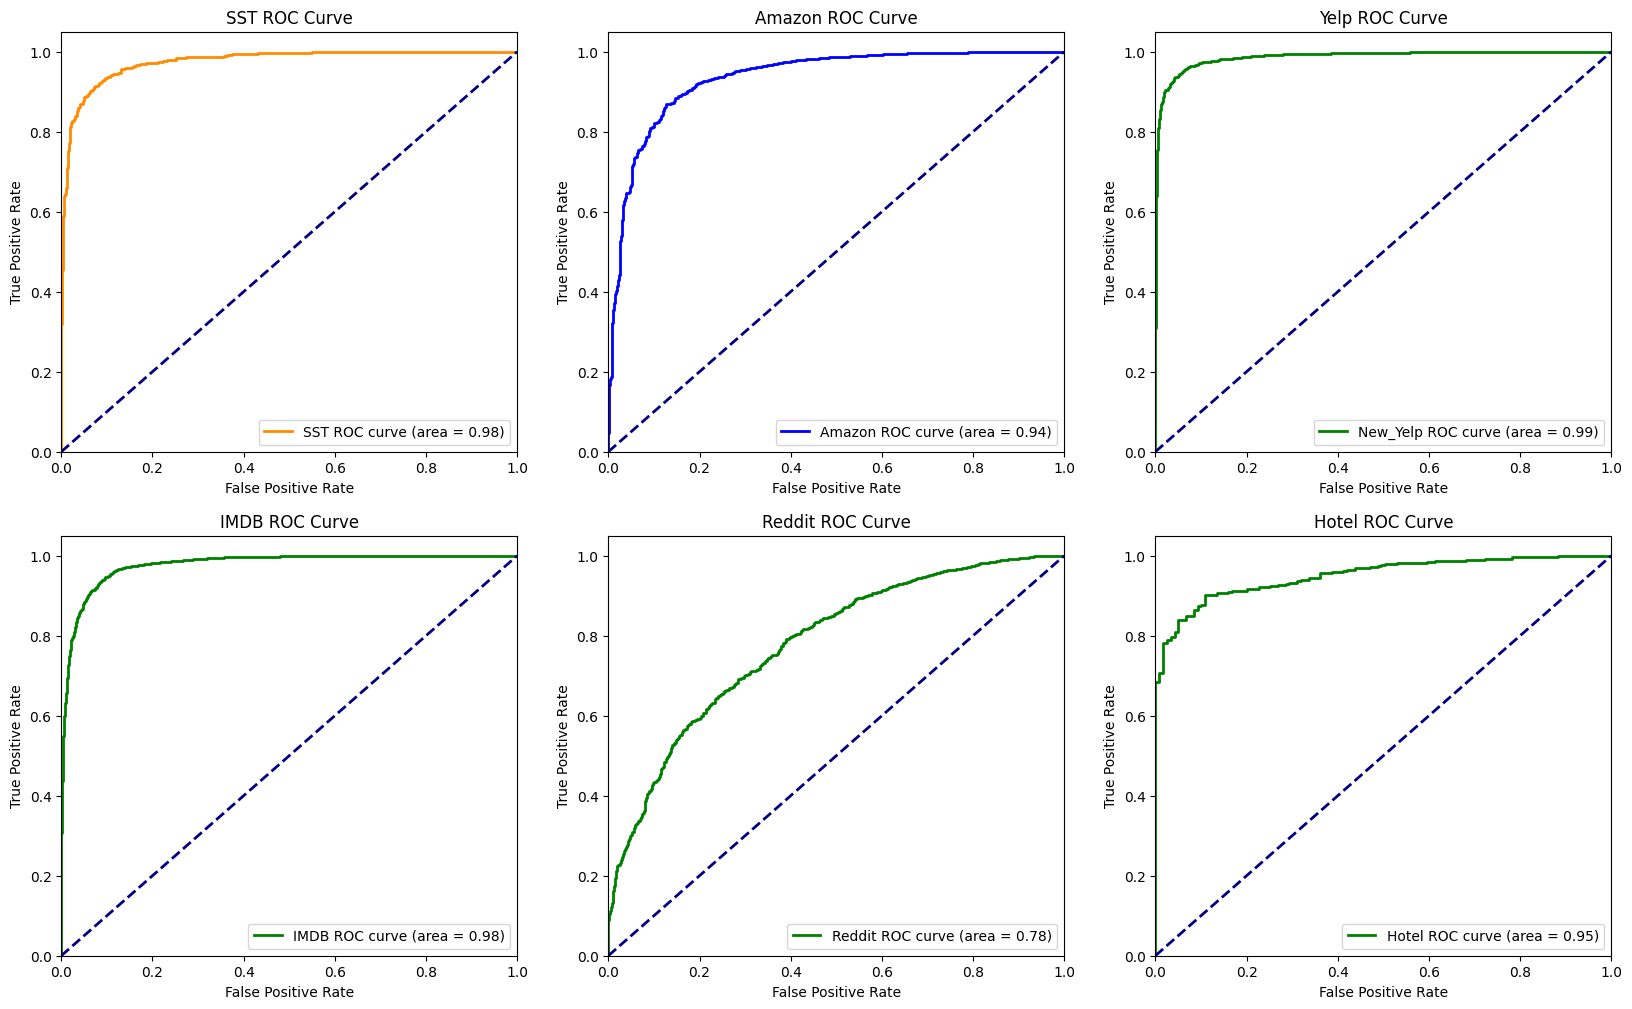

In [ ]:
# Calculate and plot ROC curve for SST dataset
SST_fpr, SST_tpr, _ = roc_curve(SST_teY, SST_model_l1.predict_proba(SST_teXt)[:, 1])
SST_auc = auc(SST_fpr, SST_tpr)

# Calculate and plot ROC curve for Amazon dataset
Amazon_fpr, Amazon_tpr, _ = roc_curve(Amazon_teY, Amazon_model_l1.predict_proba(Amazon_teXt)[:, 1])
Amazon_auc = auc(Amazon_fpr, Amazon_tpr)

# Calculate and plot ROC curve for New_Yelp dataset
New_Yelp_fpr, New_Yelp_tpr, _ = roc_curve(New_Yelp_teY, New_Yelp_model_l1.predict_proba(New_Yelp_teXt)[:, 1])
New_Yelp_auc = auc(New_Yelp_fpr, New_Yelp_tpr)

# Calculate and plot ROC curve for IMDB dataset
IMDB_fpr, IMDB_tpr, _ = roc_curve(IMDB_teY, IMDB_model_l1.predict_proba(IMDB_teXt)[:, 1])
IMDB_auc = auc(IMDB_fpr, IMDB_tpr)

# Calculate and plot ROC curve for Reddit dataset
Reddit_fpr, Reddit_tpr, _ = roc_curve(Reddit_teY, Reddit_model_l1.predict_proba(Reddit_teXt)[:, 1])
Reddit_auc = auc(Reddit_fpr, Reddit_tpr)

# Calculate and plot ROC curve for Hotel dataset
Hotel_fpr, Hotel_tpr, _ = roc_curve(Hotel_teY, Hotel_model_l1.predict_proba(Hotel_teXt)[:, 1])
Hotel_auc = auc(Hotel_fpr, Hotel_tpr)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot ROC curve for SST dataset
axes[0,0].plot(SST_fpr, SST_tpr, color='darkorange', lw=2, label='SST ROC curve (area = {:.2f})'.format(SST_auc))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set_xlim([0.0, 1.0])
axes[0,0].set_ylim([0.0, 1.05])
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('SST ROC Curve')
axes[0,0].legend(loc="lower right")

# Plot ROC curve for Amazon dataset
axes[0,1].plot(Amazon_fpr, Amazon_tpr, color='blue', lw=2, label='Amazon ROC curve (area = {:.2f})'.format(Amazon_auc))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set_xlim([0.0, 1.0])
axes[0,1].set_ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('Amazon ROC Curve')
axes[0,1].legend(loc="lower right")

# Plot ROC curve for New_Yelp dataset
axes[0,2].plot(New_Yelp_fpr, New_Yelp_tpr, color='green', lw=2, label='New_Yelp ROC curve (area = {:.2f})'.format(New_Yelp_auc))
axes[0,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,2].set_xlim([0.0, 1.0])
axes[0,2].set_ylim([0.0, 1.05])
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].set_title('Yelp ROC Curve')
axes[0,2].legend(loc="lower right")

# Plot ROC curve for IMDB dataset
axes[1,0].plot(IMDB_fpr, IMDB_tpr, color='green', lw=2, label='IMDB ROC curve (area = {:.2f})'.format(IMDB_auc))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set_xlim([0.0, 1.0])
axes[1,0].set_ylim([0.0, 1.05])
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('IMDB ROC Curve')
axes[1,0].legend(loc="lower right")

# Plot ROC curve for Reddit dataset
axes[1,1].plot(Reddit_fpr, Reddit_tpr, color='green', lw=2, label='Reddit ROC curve (area = {:.2f})'.format(Reddit_auc))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set_xlim([0.0, 1.0])
axes[1,1].set_ylim([0.0, 1.05])
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('Reddit ROC Curve')
axes[1,1].legend(loc="lower right")

# Plot ROC curve for Hotel dataset
axes[1,2].plot(Hotel_fpr, Hotel_tpr, color='green', lw=2, label='Hotel ROC curve (area = {:.2f})'.format(Hotel_auc))
axes[1,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,2].set_xlim([0.0, 1.0])
axes[1,2].set_ylim([0.0, 1.05])
axes[1,2].set_xlabel('False Positive Rate')
axes[1,2].set_ylabel('True Positive Rate')
axes[1,2].set_title('Hotel ROC Curve')
axes[1,2].legend(loc="lower right")

plt.show()